In [9]:
# Step 3: Divining the Patterns – Data Visualization & Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Set a style for our plots to make them look great.
sns.set_theme(style="whitegrid")

In [11]:
# We'll reload and re-process the data from our previous steps.
df = pd.read_csv("Amazon_Reviews.csv", on_bad_lines='skip', engine='python')
df.rename(columns={'Review Text': 'review_text', 'Rating': 'rating', 'Date of Experience': 'date_of_experience','Country':'country'}, inplace=True)
df.dropna(subset=['review_text', 'rating', 'date_of_experience'], inplace=True)
df.drop_duplicates(inplace=True)
df['rating'] = df['rating'].str.extract(r'(\d+)')
df['rating'] = df['rating'].astype(int)
df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], errors='coerce')
df.dropna(subset=['date_of_experience'], inplace=True)
df['text_length'] = df['review_text'].str.len()
df['exclamation_count'] = df['review_text'].str.count('!')
current_date = pd.Timestamp.now()
df['review_age_days'] = (current_date - df['date_of_experience']).dt.days

C:\Users\ASUS\AppData\Local\Temp\ipykernel_61492\386839561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


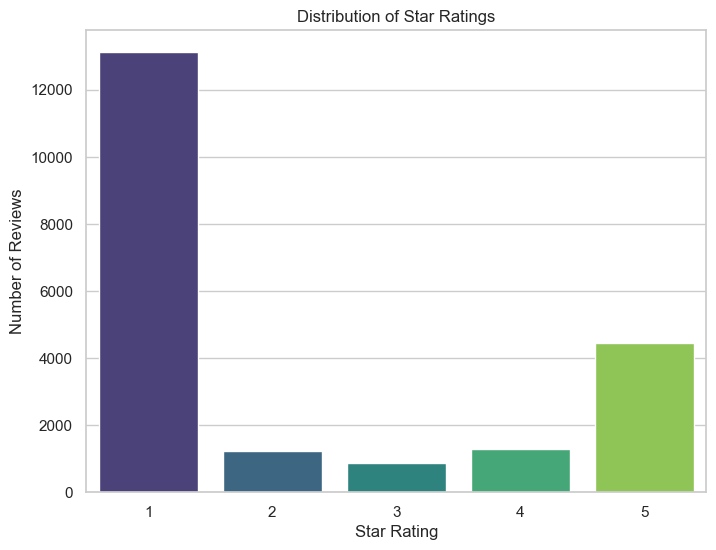

In [15]:
# Let's look at the distribution of our star ratings
# We'll use a countplot from Seaborn, a skill from Chapter 7This plot will show us the frequency of each star rating

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()


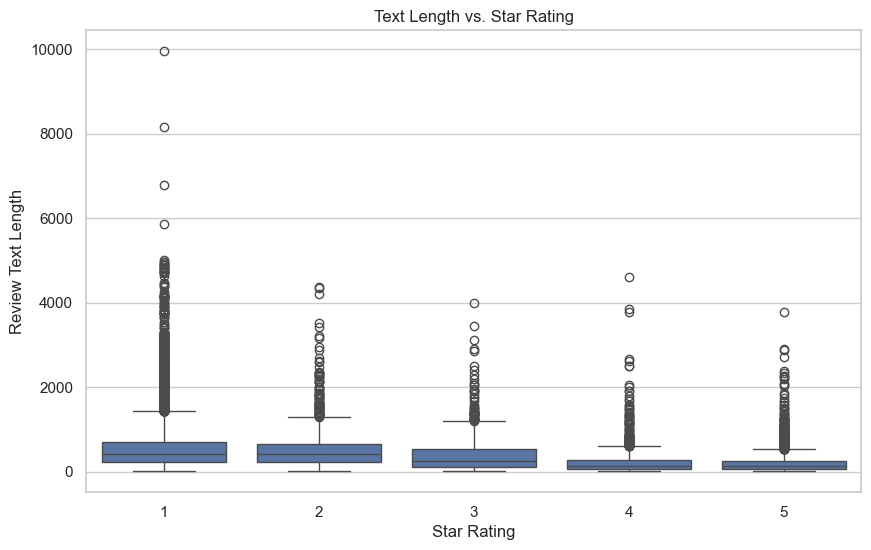

In [ ]:
# Now, let's see how our new features relate to the ratings.
# A box plot is perfect for this, as we learned in Chapter 7.
# We will compare text length across different ratings.

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='text_length', data=df)
plt.title('Text Length vs. Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Text Length')
plt.show()


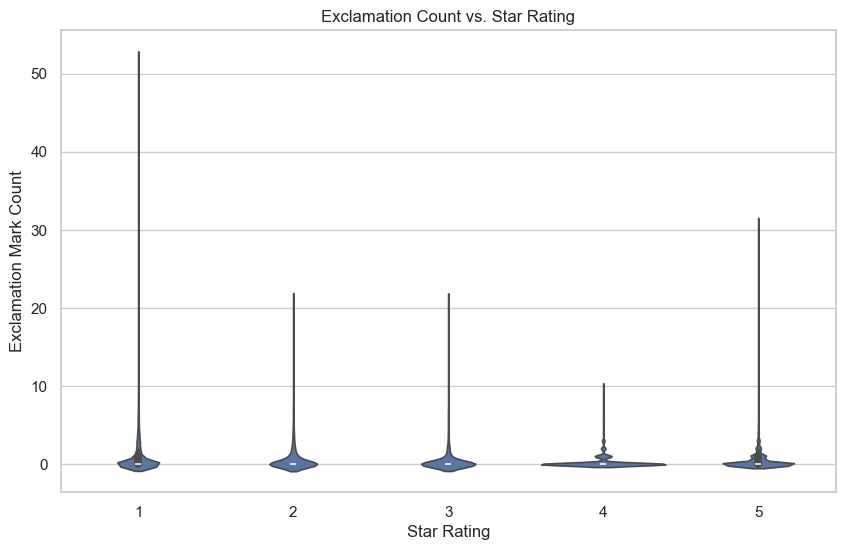

In [ ]:
# Now let's explore another new feature: exclamation count!
# We'll use a violin plot to see the density of the data, which is more
# detailed than a box plot and a great skill from Chapter 7.

plt.figure(figsize=(10, 6))
sns.violinplot(x='rating', y='exclamation_count', data=df)
plt.title('Exclamation Count vs. Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Exclamation Mark Count')
plt.show()


In [19]:
# Finally, let's get some basic descriptive statistics using groupby, a skill from Chapter 6.
print("\n--- Descriptive Statistics by Rating ---")
summary_stats = df.groupby('rating')[['text_length', 'exclamation_count']].describe()
print(summary_stats)


--- Descriptive Statistics by Rating ---
       text_length                                                      \
             count        mean         std   min    25%    50%     75%   
rating                                                                   
1          13120.0  572.102515  562.846210  11.0  238.0  414.0  712.00   
2           1227.0  537.742461  502.503058  12.0  231.5  414.0  656.00   
3            874.0  387.745995  447.458760  13.0   97.0  248.5  533.50   
4           1278.0  231.636150  349.742749  11.0   60.0  126.5  274.75   
5           4448.0  200.373201  243.711195  10.0   61.0  128.0  247.00   

               exclamation_count                                                
           max             count      mean       std  min  25%  50%  75%   max  
rating                                                                          
1       9951.0           13120.0  1.061966  2.859606  0.0  0.0  0.0  1.0  52.0  
2       4378.0            1227.0  0.66829